In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 60)
pd.set_option("display.width", 1000)

In [5]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [62]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [34]:
def check_df(dataframe, head=5):
    print("##### Shape #####" )
    print(dataframe.shape)
    print("##### Head #####" )
    print(dataframe.head(head))
    print("##### Tail #####" )
    print(dataframe.tail(head))
    print("##### Info #####" )
    print(dataframe.info())

In [ ]:
check_df(test_df)

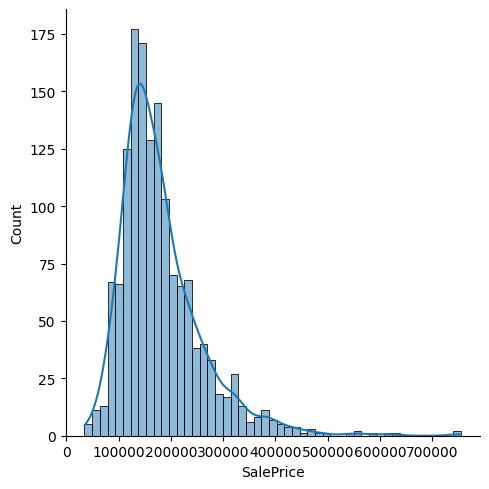

In [48]:
sns.displot(train_df["SalePrice"], kde=True);

In [50]:
train_df["SalePrice"].skew()

np.float64(1.8828757597682129)

In [49]:
train_df["SalePrice"].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [69]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_col = [col for col in df.columns if df[col].dtype == 'O']
    num_but_cat = [col for col in df.columns if df[col].dtype != 'O' and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtype == 'O' and df[col].nunique() > car_th]
    
    cat_col = cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Categorical columns: {cat_col}")
    print(f"Numerical columns: {num_cols}")
    print(f"High cardinality columns: {cat_but_car}")
    return cat_col, num_cols, cat_but_car

cat_col, num_cols, cat_but_car = grab_col_names(train_df)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'Gar

In [87]:
def num_cols_analysis(df, column, plot=True):
    print(f"##### {column} #####")
    print(df[column].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))
    
    if plot:
        plt.hist(df[column])
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

##### MSSubClass #####
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


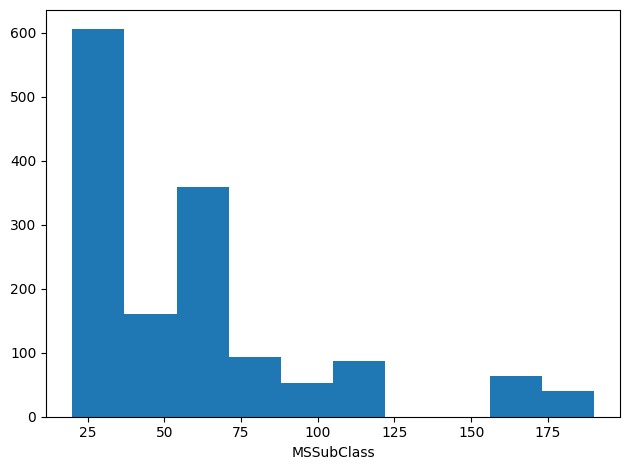

##### LotFrontage #####
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64


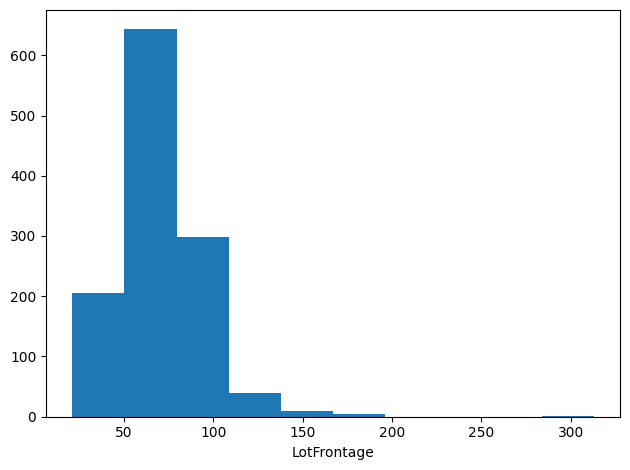

##### LotArea #####
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


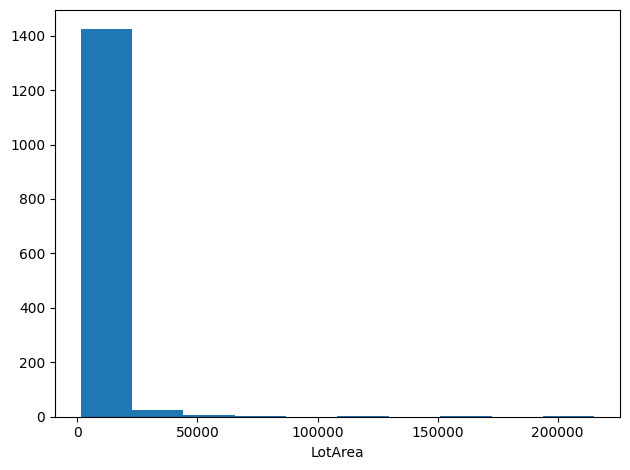

##### OverallQual #####
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


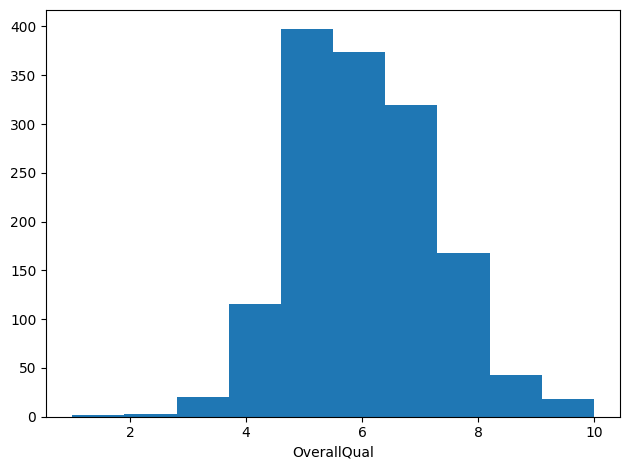

##### YearBuilt #####
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
5%       1916.000000
10%      1924.900000
20%      1947.800000
30%      1958.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1997.300000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


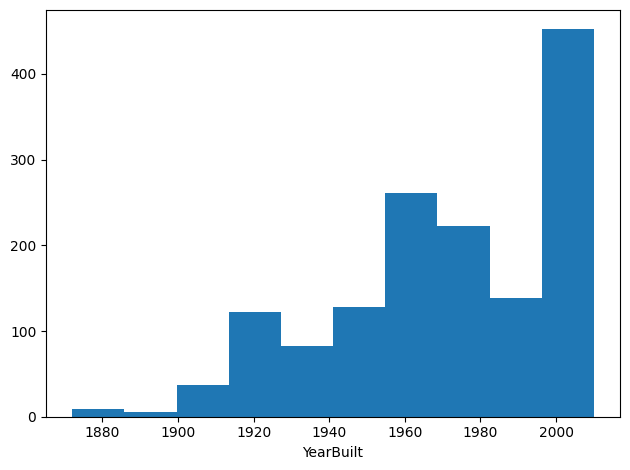

##### YearRemodAdd #####
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


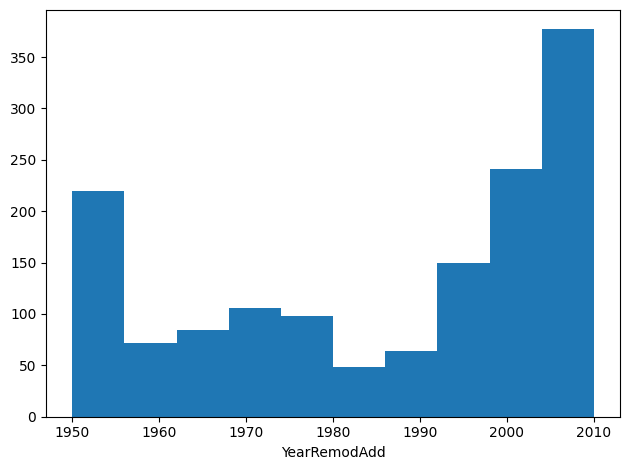

##### MasVnrArea #####
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64


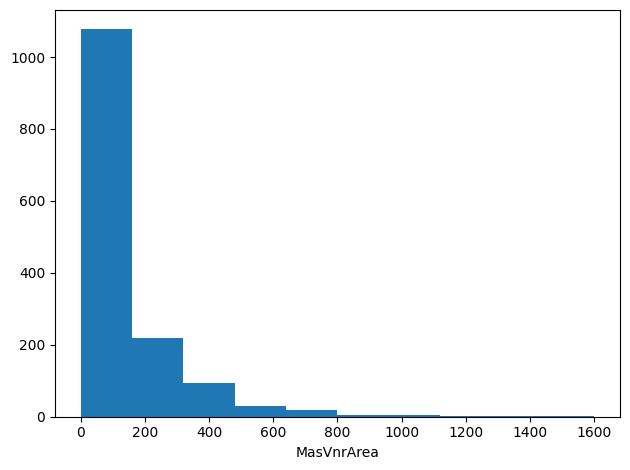

##### BsmtFinSF1 #####
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
80%       806.400000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


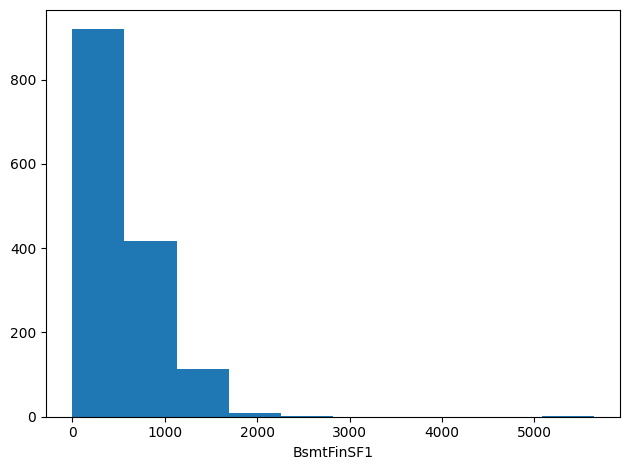

##### BsmtFinSF2 #####
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


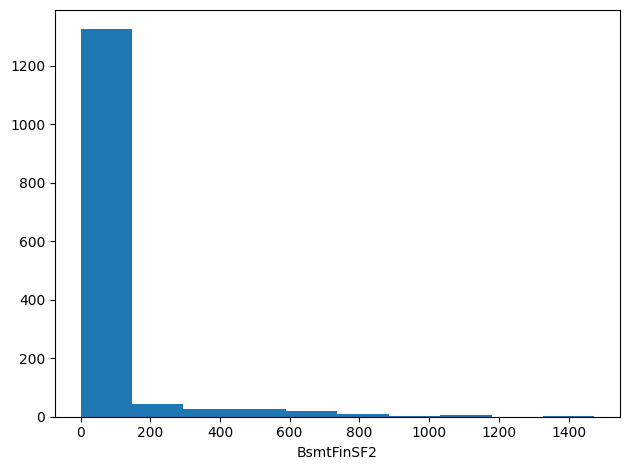

##### BsmtUnfSF #####
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


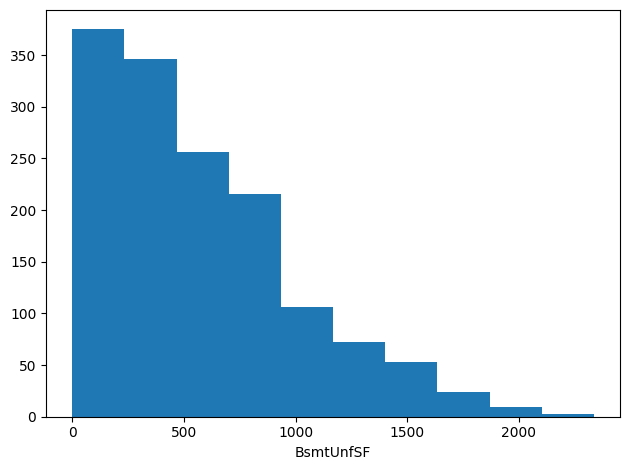

##### TotalBsmtSF #####
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
5%        519.300000
10%       636.900000
20%       755.800000
30%       840.000000
40%       910.000000
50%       991.500000
60%      1088.000000
70%      1216.000000
80%      1391.200000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


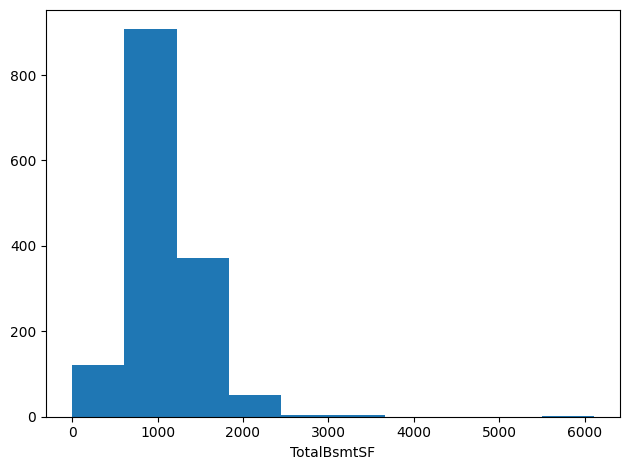

##### 1stFlrSF #####
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
5%        672.950000
10%       756.900000
20%       848.000000
30%       915.700000
40%      1000.200000
50%      1087.000000
60%      1182.000000
70%      1314.000000
80%      1482.400000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


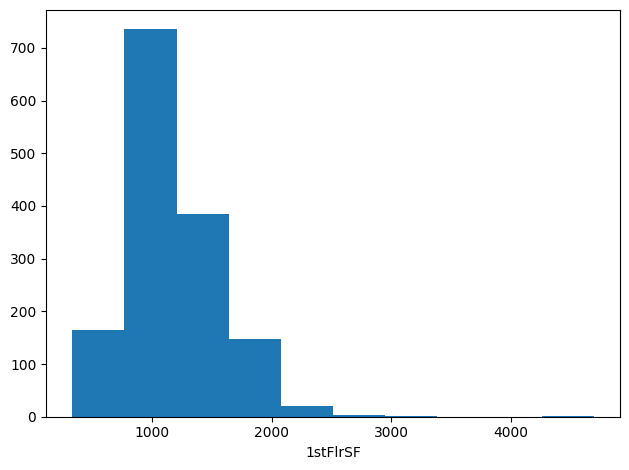

##### 2ndFlrSF #####
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       455.400000
70%       672.000000
80%       796.200000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


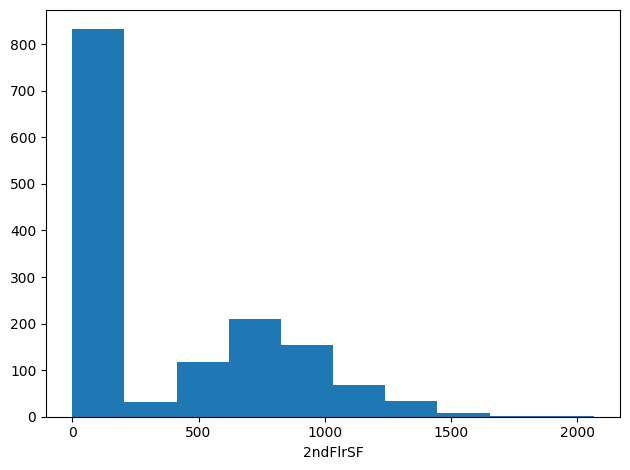

##### LowQualFinSF #####
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


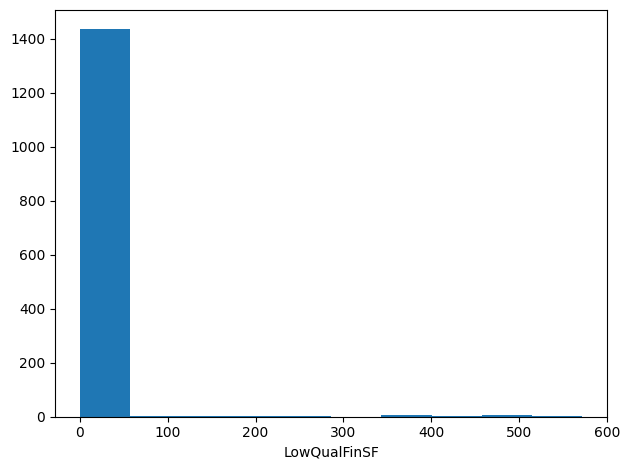

##### GrLivArea #####
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


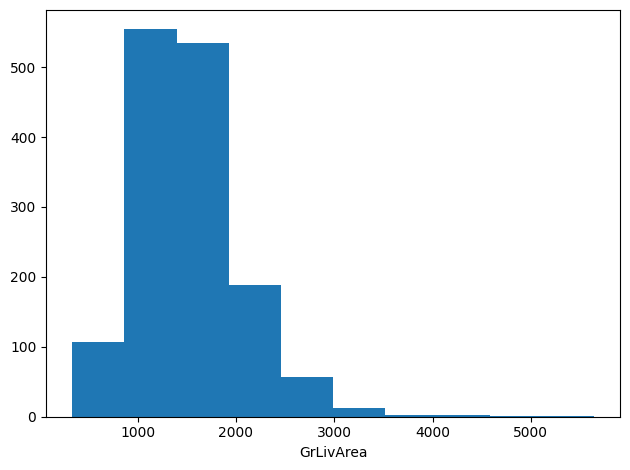

##### TotRmsAbvGrd #####
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


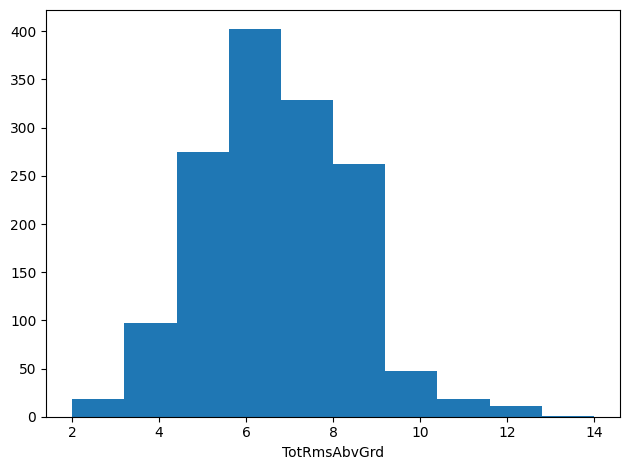

##### GarageYrBlt #####
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
5%       1930.000000
10%      1945.000000
20%      1957.000000
30%      1965.000000
40%      1973.000000
50%      1980.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


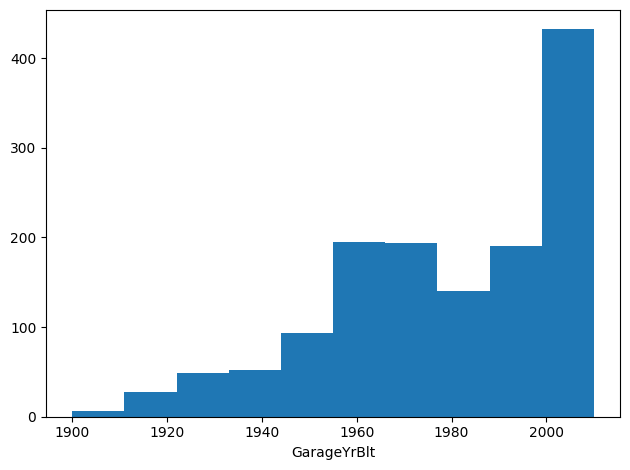

##### GarageArea #####
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       384.000000
40%       440.000000
50%       480.000000
60%       516.000000
70%       560.000000
80%       620.200000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


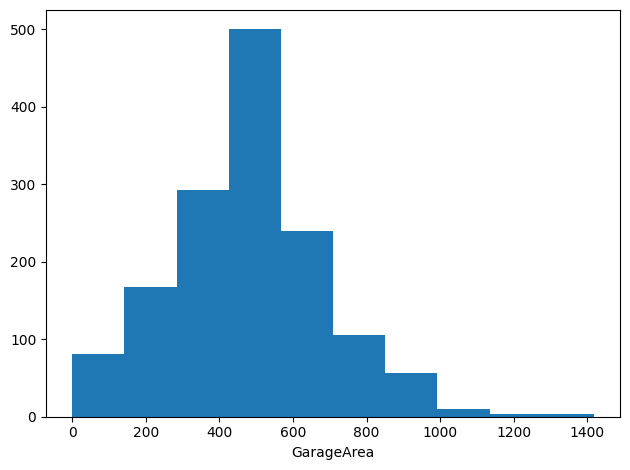

##### WoodDeckSF #####
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


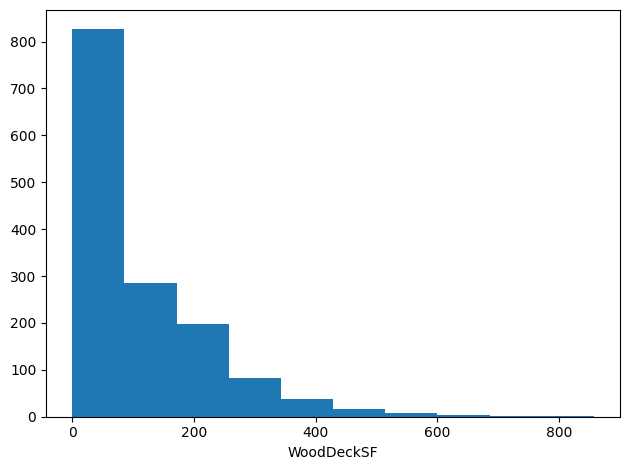

##### OpenPorchSF #####
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        25.000000
60%        40.000000
70%        57.000000
80%        83.200000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


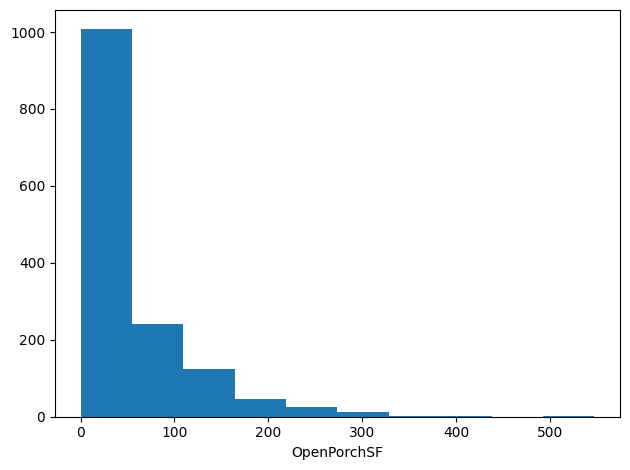

##### EnclosedPorch #####
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


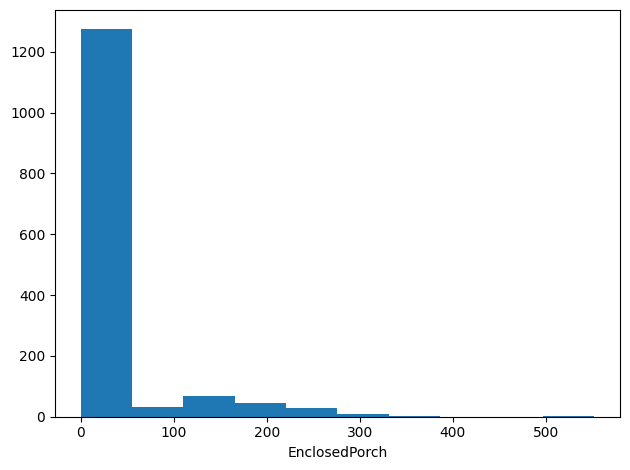

##### 3SsnPorch #####
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


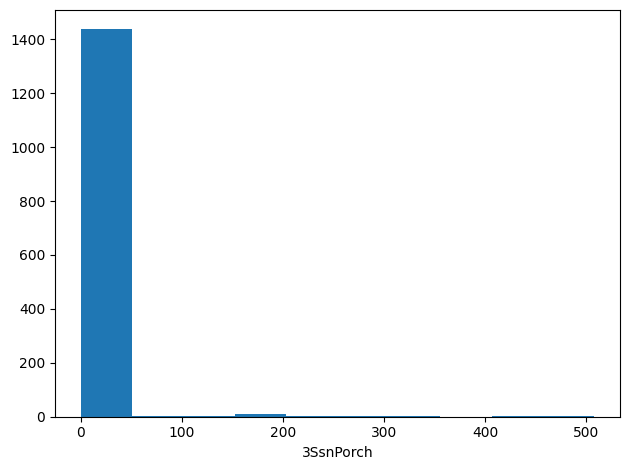

##### ScreenPorch #####
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


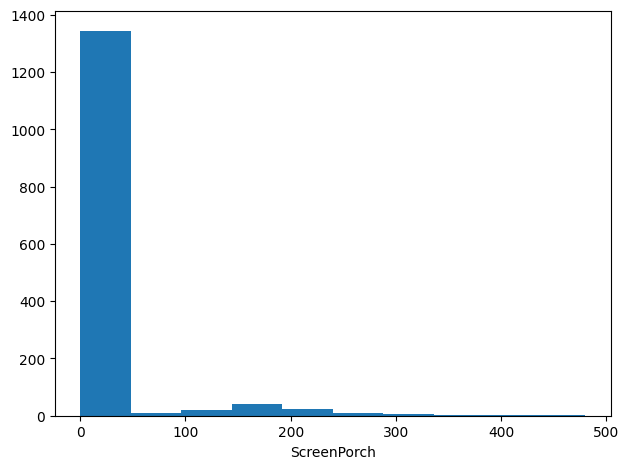

##### MiscVal #####
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


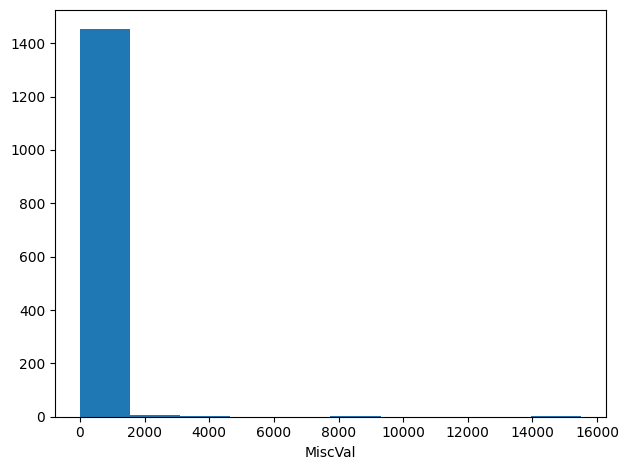

##### MoSold #####
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


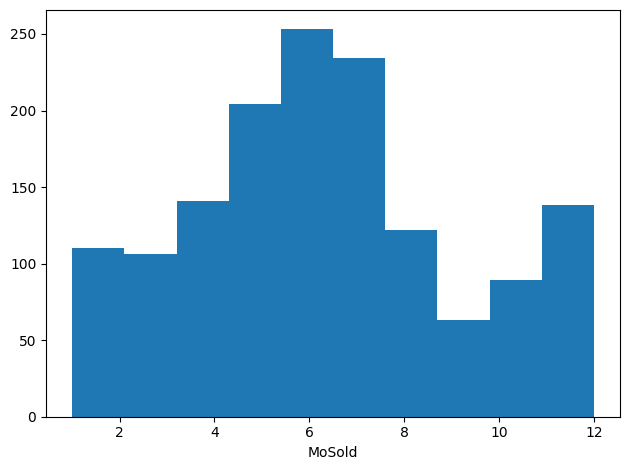

##### SalePrice #####
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


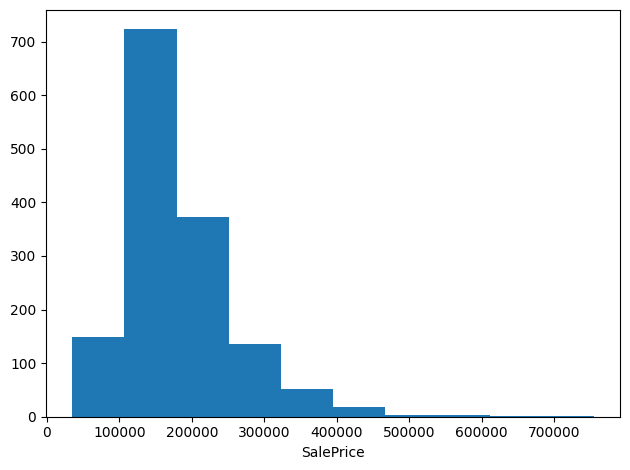

In [88]:
for col in num_cols:  
    num_cols_analysis(train_df, col)

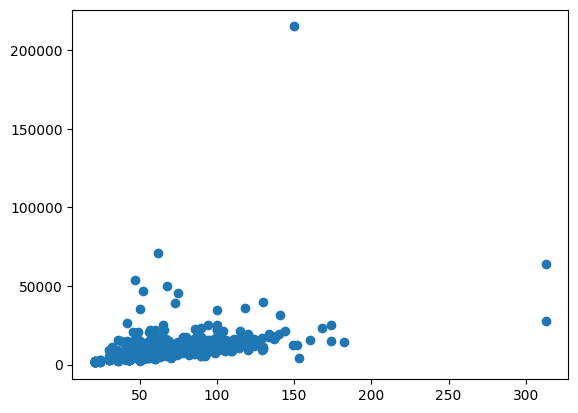

In [ ]:
plt.scatter(x=train_df["LotFrontage"], y=train_df["LotArea"]);

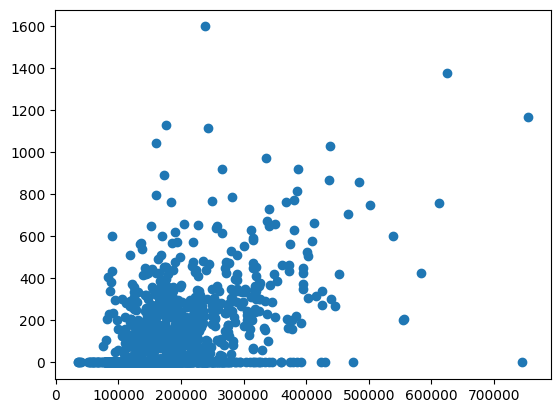

In [148]:
plt.scatter(train_df["SalePrice"], train_df["MasVnrArea"]);

In [ ]:
train_df.loc[train_df["LotFrontage"] > 300] # remove 935 and 1299

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
train_df.loc[train_df["LotArea"] > 200000] # remove 314

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [ ]:
train_df.loc[train_df["MasVnrArea"] > 1500] # remove 298

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [ ]:
train_df.loc[train_df["BsmtFinSF1"] > train_df["BsmtFinSF1"].quantile(0.99)]["BsmtFinSF1"].sort_values(ascending=False) # remove 1299

Id
1299    5644
524     2260
899     2188
1183    2096
179     1904
71      1880
54      1810
441     1767
665     1721
655     1696
988     1646
826     1636
327     1619
455     1606
252     1573
Name: BsmtFinSF1, dtype: int64

In [113]:
for col in num_cols:
    print(train_df.loc[train_df[col] > train_df[col].quantile(0.99)][col].sort_values(ascending=False))

Series([], Name: MSSubClass, dtype: int64)
Id
1299    313.0
935     313.0
1128    182.0
198     174.0
232     174.0
1108    168.0
1183    160.0
1338    153.0
1212    152.0
314     150.0
910     149.0
808     144.0
Name: LotFrontage, dtype: float64
Id
314     215245
336     164660
250     159000
707     115149
452      70761
1299     63887
1397     57200
770      53504
458      53227
385      53107
54       50271
662      46589
849      45600
524      40094
272      39104
Name: LotArea, dtype: int64
Series([], Name: OverallQual, dtype: int64)
Id
379    2010
Name: YearBuilt, dtype: int64
Id
158    2010
379    2010
820    2010
856    2010
899    2010
988    2010
Name: YearRemodAdd, dtype: int64
Id
298     1600.0
1170    1378.0
692     1170.0
116     1129.0
71      1115.0
809     1047.0
59      1031.0
982      975.0
225      922.0
518      921.0
756      894.0
350      870.0
799      860.0
826      816.0
1299     796.0
Name: MasVnrArea, dtype: float64
Id
1299    5644
524     2260
899     2

In my opinion, 1299, 314, 298, 347, 692, 323 and 496 are huge outliers that should be removed from the dataset.